In [4]:
import numpy as np
import matplotlib.pyplot as plt

### 포지셔널 인코딩

In [13]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table


pos = 7
d_model = 4
i = 0

print("Positional Encoding 값:\n", positional_encoding(pos, d_model))

print("")
for i in range(10):
    print(f"if pos == {i}, i == 0: ", np.sin(i / np.power(10000, 2 * 0 / d_model)))


print("")
for i in range(10):
    print(f"if pos == {i}, i == 1: ", np.cos(i / np.power(10000, 2 * 0 + 1 / d_model)))

Positional Encoding 값:
 [[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.99500417  0.00999983  0.9999995 ]
 [ 0.90929743  0.98006658  0.01999867  0.999998  ]
 [ 0.14112001  0.95533649  0.0299955   0.9999955 ]
 [-0.7568025   0.92106099  0.03998933  0.999992  ]
 [-0.95892427  0.87758256  0.04997917  0.9999875 ]
 [-0.2794155   0.82533561  0.05996401  0.999982  ]]

if pos == 0, i == 0:  0.0
if pos == 1, i == 0:  0.8414709848078965
if pos == 2, i == 0:  0.9092974268256817
if pos == 3, i == 0:  0.1411200080598672
if pos == 4, i == 0:  -0.7568024953079282
if pos == 5, i == 0:  -0.9589242746631385
if pos == 6, i == 0:  -0.27941549819892586
if pos == 7, i == 0:  0.6569865987187891
if pos == 8, i == 0:  0.9893582466233818
if pos == 9, i == 0:  0.4121184852417566

if pos == 0, i == 1:  1.0
if pos == 1, i == 1:  0.9950041652780258
if pos == 2, i == 1:  0.9800665778412416
if pos == 3, i == 1:  0.955336489125606
if pos == 4, i == 1:  0.9210609940028851
if pos == 5, i == 1:  0.8775

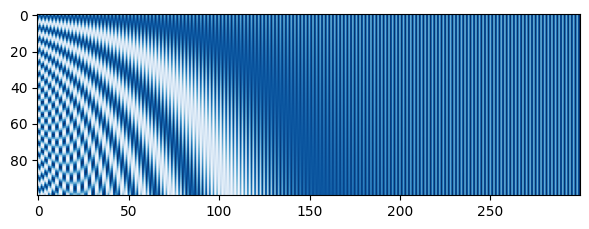

In [5]:
# 세로축이 time step
plt.figure(figsize=(7, 7))
plt.imshow(positional_encoding(100, 300), cmap="Blues")
plt.show()

### 스케일드 닷 프로덕트

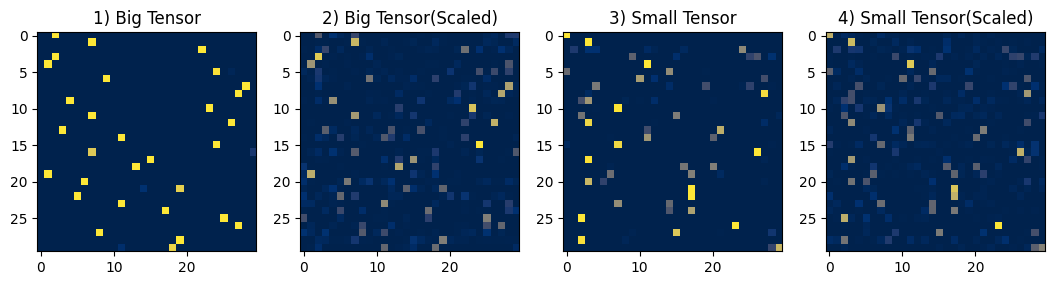

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt


def make_dot_product_tensor(shape):
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

    return tf.tensordot(A, B, axes=1)


length = 30
big_dim = 1024.0
small_dim = 10.0

big_tensor = make_dot_product_tensor((length, int(big_dim)))
scaled_big_tensor = big_tensor / tf.sqrt(big_dim)
small_tensor = make_dot_product_tensor((length, int(small_dim)))
scaled_small_tensor = small_tensor / tf.sqrt(small_dim)

fig = plt.figure(figsize=(13, 6))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.set_title("1) Big Tensor")
ax2.set_title("2) Big Tensor(Scaled)")
ax3.set_title("3) Small Tensor")
ax4.set_title("4) Small Tensor(Scaled)")

ax1.imshow(tf.nn.softmax(big_tensor, axis=-1).numpy(), cmap="cividis")
ax2.imshow(tf.nn.softmax(scaled_big_tensor, axis=-1).numpy(), cmap="cividis")
ax3.imshow(tf.nn.softmax(small_tensor, axis=-1).numpy(), cmap="cividis")
ax4.imshow(tf.nn.softmax(scaled_small_tensor, axis=-1).numpy(), cmap="cividis")

plt.show()

### 코잘 패딩

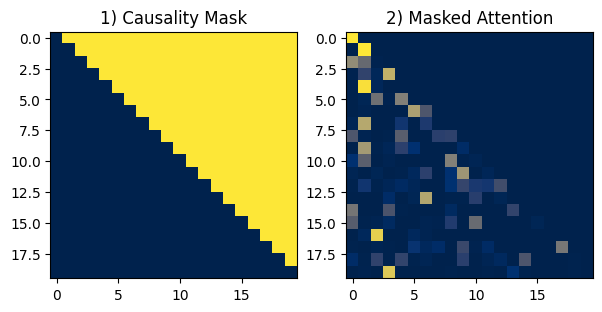

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


def make_dot_product_tensor(shape):
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

    return tf.tensordot(A, B, axes=1)


def generate_causality_mask(seq_len):
    mask = 1 - np.cumsum(np.eye(seq_len, seq_len), 0)
    return mask


sample_tensor = make_dot_product_tensor((20, 512))
sample_tensor = sample_tensor / tf.sqrt(512.0)

mask = generate_causality_mask(sample_tensor.shape[0])

fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("1) Causality Mask")
ax2.set_title("2) Masked Attention")

ax1.imshow((tf.ones(sample_tensor.shape) + mask).numpy(), cmap="cividis")

mask *= -1e9
ax2.imshow(tf.nn.softmax(sample_tensor + mask, axis=-1).numpy(), cmap="cividis")

plt.show()

### 학습률 조정

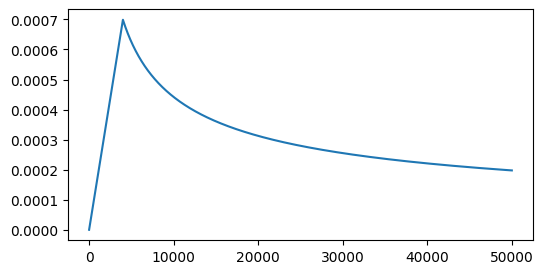

In [9]:
import matplotlib.pyplot as plt
import numpy as np

d_model = 512
warmup_steps = 4000   # 이 epoch까지 학습률이 증가하다가 로그적으로 감소 

lrates = []
for step_num in range(1, 50000):
    lrate = (np.power(d_model, -0.5)) * np.min(
        [np.power(step_num, -0.5), step_num * np.power(warmup_steps, -1.5)]
    )
    lrates.append(lrate)

plt.figure(figsize=(6, 3))
plt.plot(lrates)
plt.show()